# Predicting house prices

**Why?**

# Scope

The dataset has been downloaded from [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data)

## About the data

# Data exploration

## Dependencies

In [86]:
import sys
CONFIG_DIRECTORY = 'C:\\Users\\billy\\OneDrive\\Documents\\Python Scripts\\1. Portfolio\\house-price-regression\\house-price-regression'
if CONFIG_DIRECTORY not in sys.path:
    sys.path.insert(0, CONFIG_DIRECTORY)

import ast
import config
import datetime
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt
import warnings
plt.style.use('seaborn-v0_8-muted')

## Import data

In [87]:
raw_df = pd.read_csv(config.file_directory('raw') + 'kc_house_data.csv')
print(f"Number of records: {raw_df.shape[0]}")
print(f"Number of columns: {raw_df.shape[1]}")
raw_df.head()

Number of records: 21613
Number of columns: 21


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data types
***Key observations***

In [88]:
raw_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [89]:
raw_df.dtypes.value_counts()

int64      15
float64     5
object      1
Name: count, dtype: int64

In [90]:
raw_df['date'] = pd.to_datetime(raw_df['date'], format='%Y%m%dT000000')
raw_df['id'] = raw_df['id'].astype(object)
raw_df['waterfront'] = raw_df['waterfront'].astype('bool')
raw_df.dtypes.value_counts()

int64             13
float64            5
object             1
datetime64[ns]     1
bool               1
Name: count, dtype: int64

## Missing values
***Key observations***

In [91]:
raw_df.isnull().sum()[(raw_df.isnull().sum() > 1)]

Series([], dtype: int64)

## Frequency distributions
***Key observations***

### Date variables
***Key observations***

In [92]:
raw_df[['date']].describe()

,date
count,21613
mean,2014-10-29 04:38:01.959931648
min,2014-05-02 00:00:00
25%,2014-07-22 00:00:00
50%,2014-10-16 00:00:00
75%,2015-02-17 00:00:00
max,2015-05-27 00:00:00


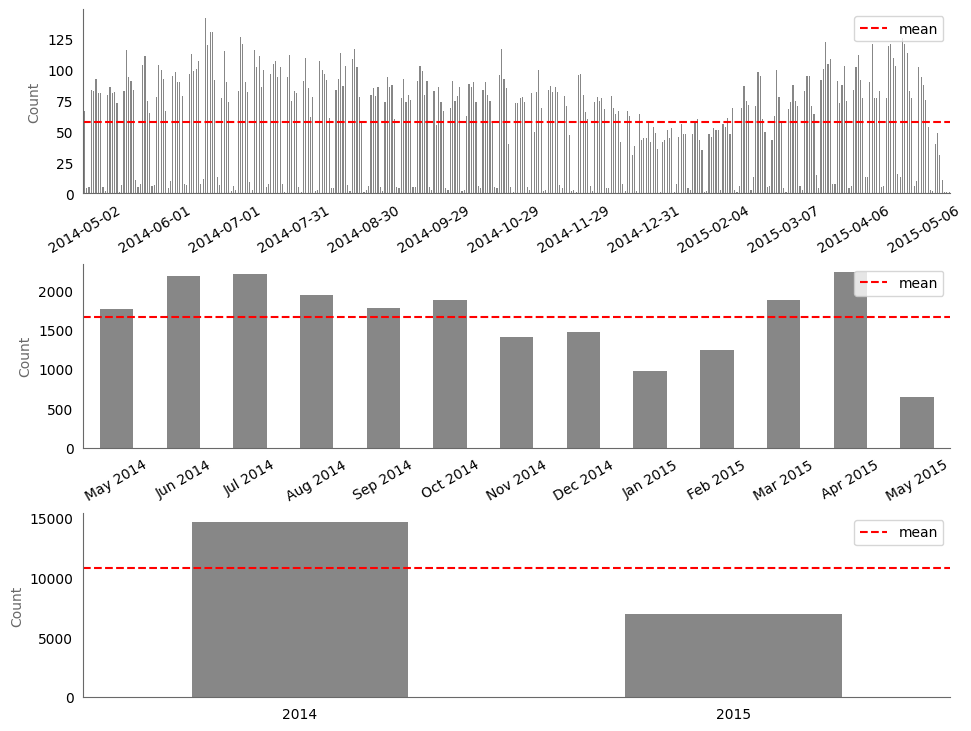

In [93]:
# Calc per day/month/year
per_day = raw_df['date'].groupby(raw_df['date']).count()
per_month = raw_df['date'].groupby([raw_df['date'].dt.year, raw_df['date'].dt.month]).count()
per_year = raw_df['date'].groupby(raw_df['date'].dt.year).count()

# Plot per day
fig, axes = plt.subplots(nrows=3, ncols=1, constrained_layout=True, figsize=(6.4*1.5, 4.8*1.5))
per_day.plot.bar(ax=axes[0], color='dimgray', alpha=0.8, label='')
axes[0].axhline(per_day.mean(), linestyle='--', color='red', label='mean')
xtick_labels = axes[0].get_xticklabels()[::30]
xtick_positions = [x.get_position()[0] for x in xtick_labels]
xtick_labels = [x.get_text()[:10] for x in xtick_labels]
axes[0].set_xticks(xtick_positions, xtick_labels)
axes[0].set_xticklabels(xtick_labels, rotation=30)

# Plot per year/month
per_month.plot.bar(ax=axes[1], color='dimgray', alpha=0.8, label='')
axes[1].axhline(per_month.mean(), linestyle='--', color='red', label='mean')
xtick_labels = [item.get_text() for item in axes[1].get_xticklabels()]
xtick_labels = [ast.literal_eval(label) for label in xtick_labels]
dates = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
xtick_labels = [dates[label[1]] + " " + str(label[0]) for label in xtick_labels]
axes[1].set_xticklabels(xtick_labels, rotation=30);

# Plot per year
per_year.plot.bar(ax=axes[2], color='dimgray', alpha=0.8, label='')
axes[2].axhline(per_year.mean(), linestyle='--', color='red', label='mean')
xtick_labels = [item.get_text() for item in axes[2].get_xticklabels()]
axes[2].set_xticklabels(xtick_labels, rotation=0);

for ax in axes:
    ax.legend(loc='upper right');
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=10, color='dimgray')
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

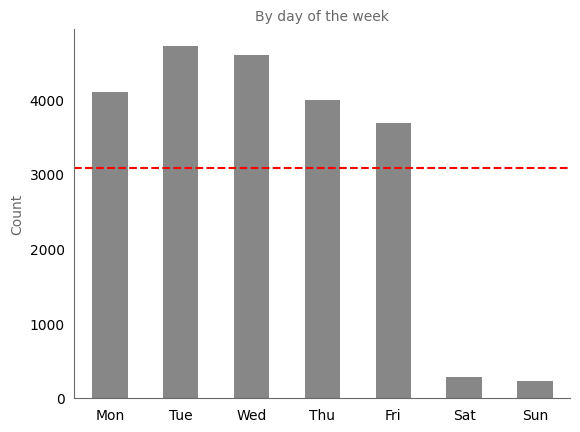

In [94]:
fig, axes = plt.subplots()
axes.tick_params(bottom=False, left=False, rotation=0)
axes.grid(False)
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')

by_dayofweek = raw_df['date'].groupby(raw_df['date'].dt.dayofweek).count()
by_dayofweek.plot.bar(ax=axes, color='dimgray', alpha=0.8, label='')
axes.axhline(by_dayofweek.mean(), linestyle='--', color='red', label='mean')
xtick_positions = [0, 1, 2, 3, 4, 5, 6]
xtick_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes.set_xticks(xtick_positions, xtick_labels, rotation=0)
axes.set_ylabel('Count', fontsize=10, color='dimgray')
axes.set_xlabel('')
axes.set_title('By day of the week', fontsize=10, color='dimgray');

### Nominal variables
***Key observations***

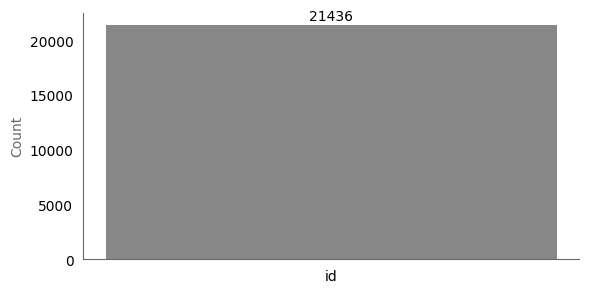

In [95]:
fig, axes = plt.subplots(figsize=(6.4, 4.8/1.5))
axes.tick_params(bottom=False, left=False)
axes.grid(False)
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')

object_nunique = raw_df.select_dtypes(include=object).nunique()
bars = axes.bar(object_nunique.index, object_nunique.values, color='dimgray', alpha=0.8)
axes.bar_label(bars, padding=1);
axes.set_ylabel('Count', fontsize=10, color='dimgray');

### Boolean variables
***Key observations***

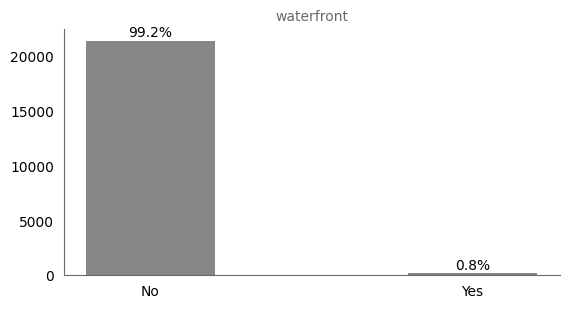

In [96]:
from custom_funcs import perc_func

fig, axes = plt.subplots(figsize=(6.4, 4.8/1.5))
axes.tick_params(bottom=False, left=False)
axes.grid(False)
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')

freq = perc_func(raw_df, 'waterfront')
bar_labels = [str(x) + '%' for x in freq['perc'].values]
bars = axes.bar(freq.index, freq['count'], color='dimgray', alpha=0.8, width=0.4)
axes.bar_label(bars, bar_labels, padding=1)
xtick_positions = [0, 1]
xtick_labels = ['No', 'Yes']
axes.set_xticks(xtick_positions, xtick_labels)
axes.set_title(f"{'waterfront'}", fontsize=10, color='dimgray');

### Numerical variables
***Key observations***

In [97]:
num_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition',
            'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
raw_df[num_cols].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


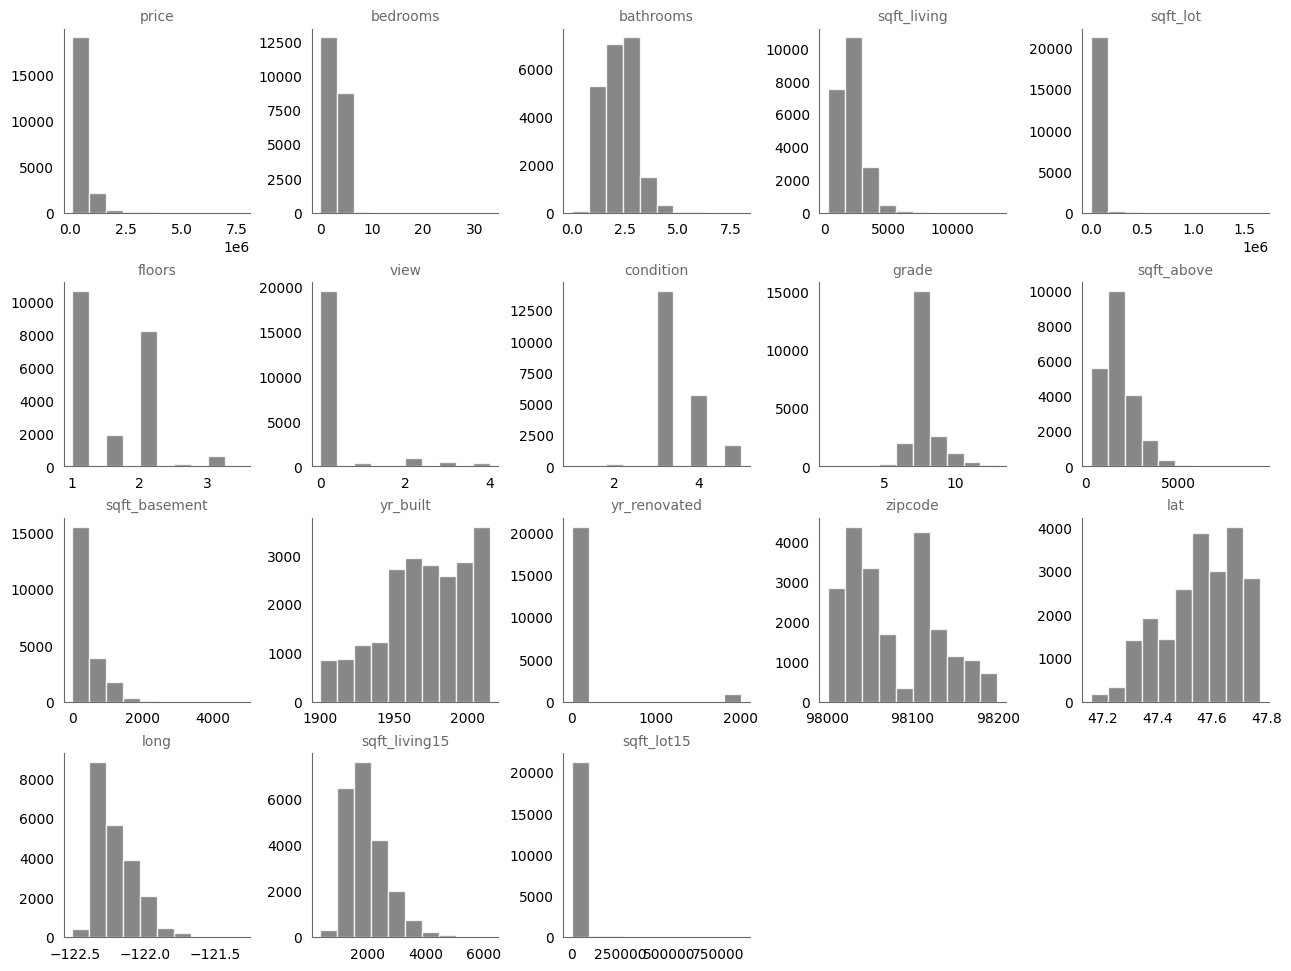

In [100]:
fig, axes = plt.subplots(
    nrows=4, ncols=5, constrained_layout=True, figsize=(6.4*2, 4.8*2))
axes = axes.flatten()
for ax, col in zip(axes, num_cols):
    bars = ax.hist(raw_df[col], color='dimgray', alpha=0.8, edgecolor ="white")
    ax.set_title(f"{col}", fontsize=10, color='dimgray')
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')
fig.delaxes(axes[18])
fig.delaxes(axes[19])

## Correlation
***Key observations***

### Numerical-numerical

* Spearman's rank was used to assess the relationship between numerical variables. This gives a correlation coefficient between -1 and 1. It is a non-parametric test, meaning it does not assume any underlying data distribution. This was important as all numerical variables exhibited non-Normal distributions and non-linear dependencies.

***Key observations***

### Categorical-categorical

* Cramer's V was used to assess bivariate associations between nominal variables. This is a non-parametric test, meaning it does not assume any underlying data distribution. It gives a value between 0 and +1.

***Key observations***

### Categorical-numerical

* One way ANOVA was used to assess the relationship between categorical and numerical variables. This determines the statistical significance of any differences in the mean of the numerical variable across different categories.

***Key observations***

# Data cleansing
***Key observations***

# Feature engineering
***Key observations***

# Model selection
***Key observations***

## Train/test split
***Key observations***

## Ordinary least squares
***Key observations***

## Polynomial regression
***Key observations***

## Regularisation
***Key observations***